In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df=pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [ ]:
x=df.drop('Gender',axis=1)
y=df['Gender']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [ ]:
from sklearn.linear_model import LogisticRegression
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

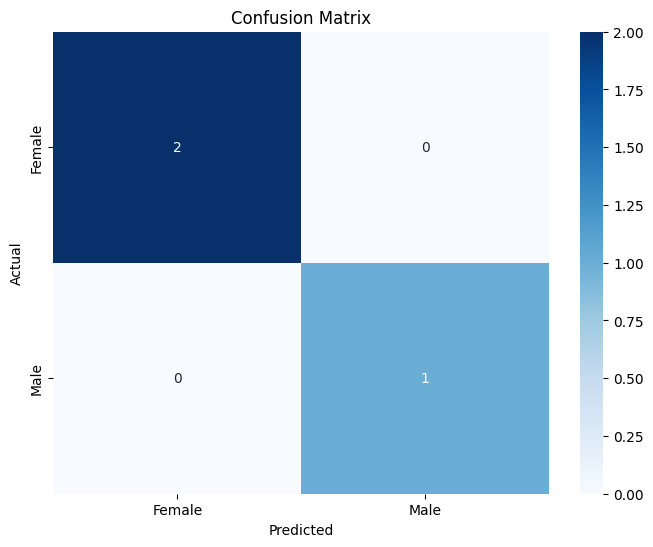

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Female','Male'],yticklabels=['Female','Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

